In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

!pip install -Uqq duckduckgo_search

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [4]:
frogIms = search_images_ddg('frog')
monkeyIms = search_images_ddg('monkey')
len(frogIms)

200

In [5]:
imagesPath = Path('images')
frogPath = Path('images/frogs')
monkeyPath = Path('images/monkeys')

In [6]:
if not imagesPath.exists():
    imagesPath.mkdir()

In [7]:
if not frogPath.exists():
    frogPath.mkdir()
    download_images(frogPath, urls=frogIms)
if not monkeyPath.exists():
    monkeyPath.mkdir()
    download_images(monkeyPath, urls=monkeyIms)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [8]:
fns = get_image_files(Path('images'))
fns

(#336) [Path('images/frogs/fe3494e7-3168-4e71-935a-e3c7de637a9c.png'),Path('images/frogs/9da97155-dcff-4af5-9b1a-b86edcfcff21.jpg'),Path('images/frogs/a399eae5-7657-475d-9262-e15b1451ea9c.jpg'),Path('images/frogs/b7ac59ce-92aa-4b38-a660-7cba27d71b53.jpg'),Path('images/frogs/6c62bbb3-3971-4d85-bc24-83e29fce6453.jpg'),Path('images/frogs/9856491d-ce26-4923-800a-ade3a54510b9.jpg'),Path('images/frogs/d21cead4-7e68-40a8-b3a3-8ede1492cdff.jpg'),Path('images/frogs/40e01efe-f1b6-4ac2-93b4-aedeffde61d9.png'),Path('images/frogs/0f57407d-b64a-4585-8d30-a5c53587f4bd.jpg'),Path('images/frogs/1e495922-e360-4d9b-8dae-46aa3e8af622.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#9) [Path('images/frogs/caa7503b-cd03-45f4-8c11-e8bf352e89b9.jpg'),Path('images/frogs/d1054cf3-f818-429c-9b7f-b7e8fa9ca1ed.jpg'),Path('images/frogs/fa70e9a2-66a1-4497-bd21-fcdf9eea1f5d.jpg'),Path('images/frogs/91c8a282-c75e-44ad-a277-1a4a1e828727.jpg'),Path('images/frogs/186bdad1-f0e1-455f-b845-fe08abd77407.jpg'),Path('images/frogs/479b26f0-4f90-4849-b227-204e5d719371.jpg'),Path('images/frogs/1e7772a8-c617-4d15-9c18-acae5f4df25c.jpg'),Path('images/frogs/c6f76606-3c34-45b7-a845-1abdee36800f.jpg'),Path('images/monkeys/7136f989-d526-4fb1-9b3c-96fc229eb7da.jpg')]

In [10]:
failed.map(Path.unlink)

(#9) [None,None,None,None,None,None,None,None,None]

In [11]:
frogOrMonkeys = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
item_tfms=Resize(128))

In [12]:
dls = frogOrMonkeys.dataloaders(imagesPath)

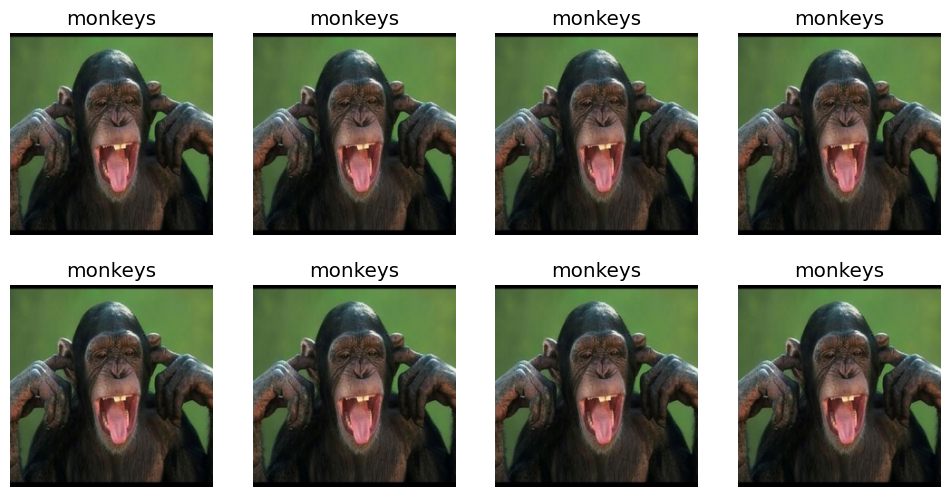

In [13]:
frogOrMonkeys = frogOrMonkeys.new(item_tfms=RandomResizedCrop(224, min_scale=0.3))
dls = frogOrMonkeys.dataloaders(imagesPath)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 119MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.794387,0.027569,0.000000,00:34


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.137437,0.018549,0.000000,00:44
1,0.114092,0.006745,0.000000,00:44
2,0.087772,0.003625,0.000000,00:44
3,0.070133,0.003340,0.000000,00:44


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

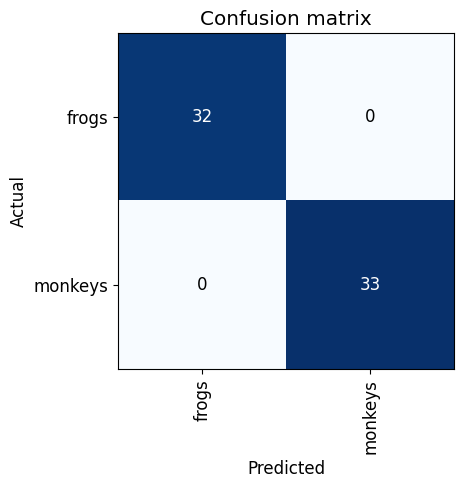

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
learn.export()

In [17]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')

In [19]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [24]:
frogPath.ls()
btn_upload = SimpleNamespace(data = ['images/frogs/fe3494e7-3168-4e71-935a-e3c7de637a9c.png'])

In [25]:
img = PILImage.create(btn_upload.data[-1])

In [26]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

In [28]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: frogs; Probability: 1.0000')

In [29]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [31]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [32]:
btn_upload = widgets.FileUpload()

In [33]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])